In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import product


In [2]:
df1 = pd.read_csv('./ex1_result.csv', index_col=0)
df2 = pd.read_csv('./ex2_result.csv', index_col=0)
df3 = pd.read_csv('./ex3_result.csv', index_col=0)
df4 = pd.read_csv('./ex4_result.csv', index_col=0)

In [3]:
df4

,year,year_train_time,b/m_train_time,all_train_time,year model_file_size,b/m model_file_size,all model_file_size,accuracy,f1 score
0,2014,102.278948,1668.528080,1770.807028,45.59 KB,7.86 MB,7.9 MB,0.819833,0.833311
1,2015,272.593975,1710.929871,1983.523846,447.24 KB,16.25 MB,16.69 MB,0.836250,0.854640
2,2016,357.078075,1691.186666,2048.264742,524.99 KB,23.17 MB,23.68 MB,0.861292,0.890150
3,2017,454.142809,1489.985704,1944.128513,578.48 KB,27.84 MB,28.4 MB,0.877917,0.903058
4,2018,598.846674,2576.433659,3175.280333,617.58 KB,32.39 MB,32.99 MB,0.870667,0.900740
5,2019,687.688351,1560.522556,2248.210907,666.96 KB,35.82 MB,36.47 MB,0.964417,0.963785
6,2020,789.910316,1681.072712,2470.983028,715.88 KB,39.06 MB,39.76 MB,0.964250,0.963492


# train time

In [4]:
dfs = pd.DataFrame()
dfs['ex1'] = df1['train_time']
dfs['ex2'] = df2['train_time']
dfs['ex3'] = df3['train_time']
dfs['ex4'] = df4['all_train_time']
dfs.index = range(2014,2021)
dfs

,ex1,ex2,ex3,ex4
2014,1669.679403,2656.193256,1478.762150,1770.807028
2015,3781.354189,2870.215893,1531.098366,1983.523846
2016,5940.449238,2936.114550,1468.998194,2048.264742
2017,9049.202919,2249.761343,1325.958252,1944.128513
2018,13406.296968,4301.076651,2238.579512,3175.280333
2019,21703.811884,2255.065203,1385.416508,2248.210907
2020,29611.822844,2078.777552,1475.602865,2470.983028


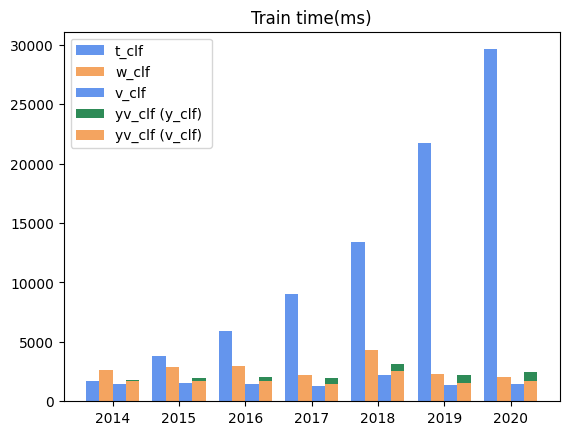

In [5]:
if not os.path.isdir('./visual5'):
    os.mkdir('./visual5')



years = range(2014,2021)
x = np.arange(len(years))


plt.bar(x-0.3 , df1['train_time'], label="t_clf", width=0.2, color='cornflowerblue')
plt.bar(x-0.1 , df2['train_time'], label="w_clf", width=0.2, color='sandybrown')
plt.bar(x+0.1 , df3['train_time'], label="v_clf", width=0.2, color='cornflowerblue')
# plt.bar(x+0.3 , df4['all_train_time'], label="ex4", width=0.2, color='sandybrown')
plt.bar(x+0.3 , df4['year_train_time'], label="yv_clf (y_clf) ", width=0.2, color='seagreen', bottom = df4['b/m_train_time'])
plt.bar(x+0.3 , df4['b/m_train_time'], label="yv_clf (v_clf)", width=0.2, color='sandybrown')


plt.title(f'Train time(ms)')
plt.xticks(x, years)
plt.legend()
plt.savefig(f"./visual5/time.png")
plt.show()

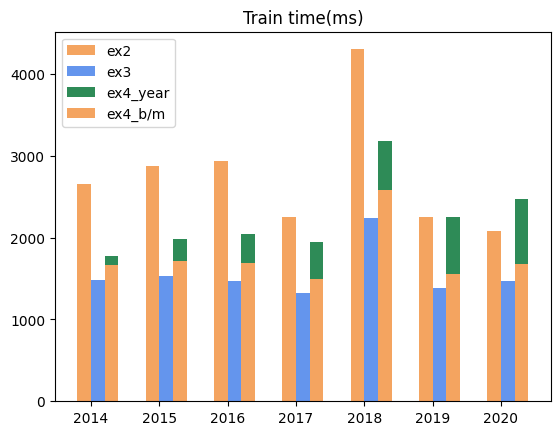

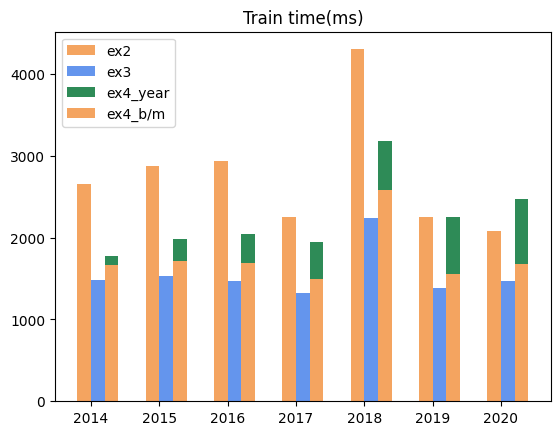

In [6]:
years = range(2014,2021)
x = np.arange(len(years))


plt.bar(x-0.1 , df2['train_time'], label="ex2", width=0.2, color='sandybrown')
plt.bar(x+0.1 , df3['train_time'], label="ex3", width=0.2, color='cornflowerblue')
# plt.bar(x+0.3 , df4['all_train_time'], label="ex4", width=0.2, color='seagreen')
plt.bar(x+0.3 , df4['year_train_time'], label="ex4_year", width=0.2, color='seagreen', bottom = df4['b/m_train_time'])
plt.bar(x+0.3 , df4['b/m_train_time'], label="ex4_b/m", width=0.2, color='sandybrown')


plt.title(f'Train time(ms)')
plt.xticks(x, years)
plt.legend(loc=2)
plt.savefig(f"./visual5/time2.png")
plt.show()

In [7]:
dfs_2 = pd.DataFrame()
dfs_2['ex2'] = df2['train_time']
dfs_2['ex3'] = df3['train_time']
dfs_2['ex4_year'] = df4['year_train_time']
dfs_2['ex4_b/m'] = df4['b/m_train_time']
dfs_2['ex4_all'] = df4['all_train_time']
dfs_2.index = range(2014,2021)
dfs_2

,ex2,ex3,ex4_year,ex4_b/m,ex4_all
2014,2656.193256,1478.762150,102.278948,1668.528080,1770.807028
2015,2870.215893,1531.098366,272.593975,1710.929871,1983.523846
2016,2936.114550,1468.998194,357.078075,1691.186666,2048.264742
2017,2249.761343,1325.958252,454.142809,1489.985704,1944.128513
2018,4301.076651,2238.579512,598.846674,2576.433659,3175.280333
2019,2255.065203,1385.416508,687.688351,1560.522556,2248.210907
2020,2078.777552,1475.602865,789.910316,1681.072712,2470.983028


In [29]:
dfs_2['ex4_year']/dfs_2['ex4_all']*100

2014     5.775838
2015    13.742914
2016    17.433199
2017    23.359711
2018    18.859647
2019    30.588249
2020    31.967452
dtype: float64

In [30]:
dfs_2['ex4_b/m']/dfs_2['ex4_all']*100

2014    94.224162
2015    86.257086
2016    82.566801
2017    76.640289
2018    81.140353
2019    69.411751
2020    68.032548
dtype: float64

# file size

In [8]:
dfs2 = pd.DataFrame()
dfs2['ex1'] = df1['model_file_size'].str[:-3].astype(float)
dfs2['ex2'] = df2['model_file_size'].str[:-3].astype(float)
dfs2['ex3'] = df3['model_file_size'].str[:-3].astype(float)
dfs2['ex4'] = df4['all model_file_size'].str[:-3].astype(float)
dfs2.index = range(2014,2021)
dfs2

,ex1,ex2,ex3,ex4
2014,7.86,7.86,7.86,7.90
2015,15.61,16.29,16.25,16.69
2016,20.21,22.92,23.17,23.68
2017,24.41,27.52,27.84,28.40
2018,27.72,31.94,32.39,32.99
2019,36.02,35.27,35.82,36.47
2020,39.98,38.39,39.06,39.76


In [9]:
dfs2_2 = pd.DataFrame()
dfs2_2['ex1'] = df1['model_file_size'].str[:-3].astype(float)
dfs2_2['ex2'] = df2['model_file_size'].str[:-3].astype(float)
dfs2_2['ex3'] = df3['model_file_size'].str[:-3].astype(float)
dfs2_2['ex4_year'] = df4['year model_file_size'].str[:-3].astype(float)/1024
dfs2_2['ex4_b/m'] = df4['b/m model_file_size'].str[:-3].astype(float)
dfs2_2['ex4_all'] = df4['all model_file_size'].str[:-3].astype(float)
dfs2_2['ex4_year'][0]=0.04
dfs2_2.index = range(2014,2021)
dfs2_2

,ex1,ex2,ex3,ex4_year,ex4_b/m,ex4_all
2014,7.86,7.86,7.86,0.040000,7.86,7.90
2015,15.61,16.29,16.25,0.436758,16.25,16.69
2016,20.21,22.92,23.17,0.512686,23.17,23.68
2017,24.41,27.52,27.84,0.564922,27.84,28.40
2018,27.72,31.94,32.39,0.603105,32.39,32.99
2019,36.02,35.27,35.82,0.651328,35.82,36.47
2020,39.98,38.39,39.06,0.699102,39.06,39.76


In [27]:
dfs2_2['ex4_year']/dfs2_2['ex4_all']*100

2014    0.506329
2015    2.616883
2016    2.165057
2017    1.989162
2018    1.828146
2019    1.785929
2020    1.758304
dtype: float64

In [28]:
dfs2_2['ex4_b/m']/dfs2_2['ex4_all']*100

2014    99.493671
2015    97.363691
2016    97.846284
2017    98.028169
2018    98.181267
2019    98.217713
2020    98.239437
dtype: float64

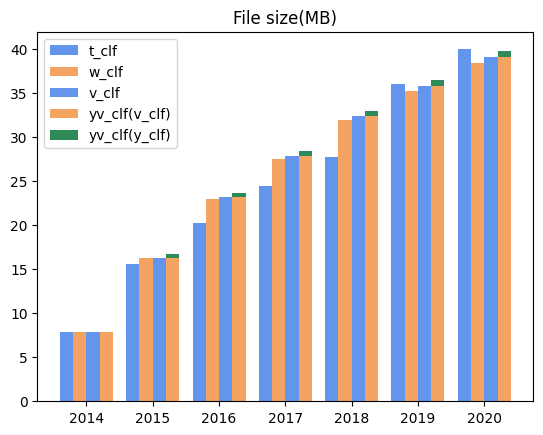

In [10]:
years = range(2014,2021)
x = np.arange(len(years))

plt.bar(x-0.3 , dfs2['ex1'], label="t_clf", width=0.2, color='cornflowerblue')
plt.bar(x-0.1 , dfs2['ex2'], label="w_clf", width=0.2, color='sandybrown')
plt.bar(x+0.1 , dfs2['ex3'], label="v_clf", width=0.2, color='cornflowerblue')
plt.bar(x+0.3 , dfs2_2['ex4_b/m'], label="yv_clf(v_clf)", width=0.2, color='sandybrown')
plt.bar(x+0.3 , dfs2_2['ex4_year'], label="yv_clf(y_clf)", width=0.2, color='seagreen', bottom = dfs2_2['ex4_b/m'])



plt.title(f'File size(MB)')
plt.xticks(x, years)
plt.legend()
plt.savefig(f"./visual5/filesize.png")
plt.show()

In [11]:
dfs3 = pd.DataFrame()
dfs3['ex1'] = df1['accuracy']
dfs3['ex2'] = df2['accuracy']
dfs3['ex3'] = df3['accuracy']
dfs3['ex4'] = df4['accuracy']
dfs3.index = range(2014,2021)
dfs3

,ex1,ex2,ex3,ex4
2014,0.819833,0.819833,0.819833,0.819833
2015,0.845083,0.849125,0.842750,0.836250
2016,0.863958,0.863417,0.863458,0.861292
2017,0.873250,0.866167,0.866375,0.877917
2018,0.872250,0.873417,0.871667,0.870667
2019,0.968875,0.873125,0.875583,0.964417
2020,0.970583,0.865042,0.865833,0.964250


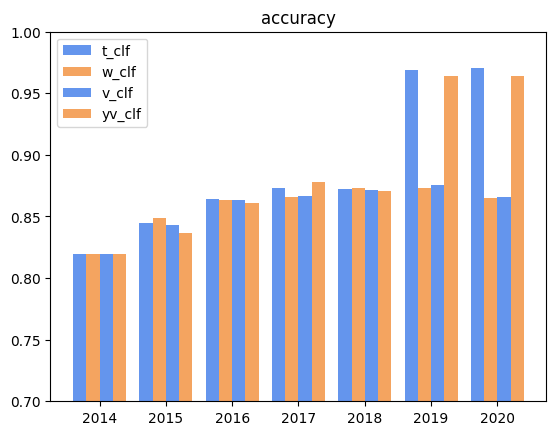

In [12]:
years = range(2014,2021)
x = np.arange(len(years))


plt.bar(x-0.3 , dfs3['ex1'], label="t_clf", width=0.2, color='cornflowerblue')
plt.bar(x-0.1 , dfs3['ex2'], label="w_clf", width=0.2, color='sandybrown')
plt.bar(x+0.1 , dfs3['ex3'], label="v_clf", width=0.2, color='cornflowerblue')
plt.bar(x+0.3 , dfs3['ex4'], label="yv_clf", width=0.2, color='sandybrown')

plt.title(f'accuracy')
plt.xticks(x, years)
plt.ylim(0.7,1)
plt.legend()
plt.savefig(f"./visual5/acc.png")
plt.show()

In [13]:
def AUT(list_):
    return sum([(list_[i] + list_[i+1])/2 for i, elm in enumerate(list_[:-1])])/(len(list_)-1) 

In [14]:
AUT(list(dfs3['ex1'])), AUT(list(dfs3['ex2'])), AUT(list(dfs3['ex3'])), AUT(list(dfs3['ex4']))

(0.8864375, 0.8612812500000001, 0.8604444444444445, 0.8837638888888889)

In [15]:
dfs4 = pd.DataFrame()
dfs4['ex1'] = df1['f1 score']
dfs4['ex2'] = df2['f1 score']
dfs4['ex3'] = df3['f1 score']
dfs4['ex4'] = df4['f1 score']
dfs4.index = range(2014,2021)
dfs4

,ex1,ex2,ex3,ex4
2014,0.833311,0.833311,0.833311,0.833311
2015,0.864195,0.865700,0.859634,0.854640
2016,0.896950,0.888783,0.888700,0.890150
2017,0.907220,0.891122,0.891137,0.903058
2018,0.907322,0.899657,0.898404,0.900740
2019,0.968750,0.892756,0.894629,0.963785
2020,0.970493,0.867997,0.870202,0.963492


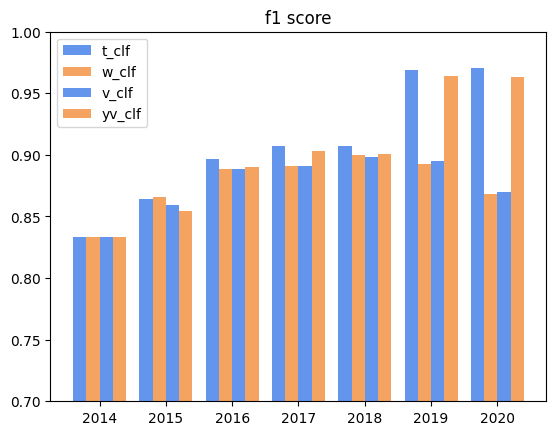

In [16]:
years = range(2014,2021)
x = np.arange(len(years))


plt.bar(x-0.3 , dfs4['ex1'], label="t_clf", width=0.2, color='cornflowerblue')
plt.bar(x-0.1 , dfs4['ex2'], label="w_clf", width=0.2, color='sandybrown')
plt.bar(x+0.1 , dfs4['ex3'], label="v_clf", width=0.2, color='cornflowerblue')
plt.bar(x+0.3 , dfs4['ex4'], label="yv_clf", width=0.2, color='sandybrown')

plt.title(f'f1 score')
plt.xticks(x, years)
plt.ylim(0.7,1)
plt.legend()
plt.savefig(f"./visual5/f1.png")
plt.show()

In [17]:
df=pd.DataFrame(
[
[0.9695, 0.9725, 0.9685, 0.984, 0.9545, 0.973, 0.9725],
[0.8815, 0.829, 0.886, 0.963, 0.9465, 0.7495, 0.751],
[0.884, 0.8355, 0.8925, 0.963, 0.947, 0.746, 0.738],
[0.9755, 0.9745, 0.9705, 0.958, 0.9375, 0.969, 0.9765]
]).T
df.columns=['t_clf','w_clf','v_clf','yv_clf']
df.index=range(2014,2021)

In [18]:
df

,t_clf,w_clf,v_clf,yv_clf
2014,0.9695,0.8815,0.8840,0.9755
2015,0.9725,0.8290,0.8355,0.9745
2016,0.9685,0.8860,0.8925,0.9705
2017,0.9840,0.9630,0.9630,0.9580
2018,0.9545,0.9465,0.9470,0.9375
2019,0.9730,0.7495,0.7460,0.9690
2020,0.9725,0.7510,0.7380,0.9765


In [19]:
com_maker_line= list(product( ['solid','dotted','dashed','dashdot'],['x','.','|']))

In [20]:
plt.plot(df[col], linestyle=com_maker_line[i][0] , marker=com_maker_line[i][1])

NameError: name 'col' is not defined

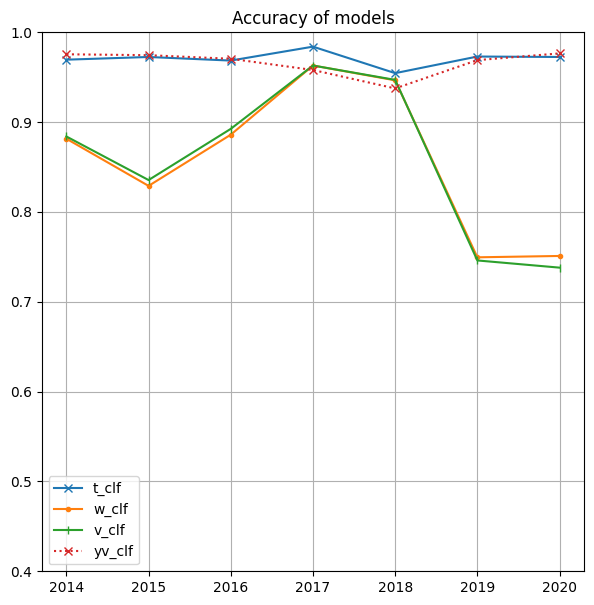

In [21]:
plt.figure(figsize=(7,7))
for i,col in enumerate(df.columns):
    plt.plot(df[col], linestyle=com_maker_line[i][0] , marker=com_maker_line[i][1], label=col)

plt.grid()
plt.legend(loc=3,bbox_to_anchor=(0, 0))
plt.title('Accuracy of models')
plt.ylim(0.4,1)

plt.savefig('./visual5/2020_acc_plot.png')
plt.show()

In [22]:
df=pd.DataFrame(
[
[0.972, 0.976, 0.9685, 0.9835, 0.9565, 0.9665, 0.9525],
[0.948, 0.9145, 0.943, 0.9675, 0.954, 0.662, 0.6475],
[0.9455, 0.9185, 0.9445, 0.968, 0.954, 0.673, 0.6455]
,
[0.975, 0.9745, 0.971, 0.959, 0.9455, 0.97, 0.958]
]).T
df.columns=['t_clf','w_clf','v_clf','yv_clf']
df.index=range(2014,2021)

In [23]:
df

,t_clf,w_clf,v_clf,yv_clf
2014,0.9720,0.9480,0.9455,0.9750
2015,0.9760,0.9145,0.9185,0.9745
2016,0.9685,0.9430,0.9445,0.9710
2017,0.9835,0.9675,0.9680,0.9590
2018,0.9565,0.9540,0.9540,0.9455
2019,0.9665,0.6620,0.6730,0.9700
2020,0.9525,0.6475,0.6455,0.9580


In [24]:
com_maker_line= list(product( ['solid','dotted','dashed','dashdot'],['x','.','|']))

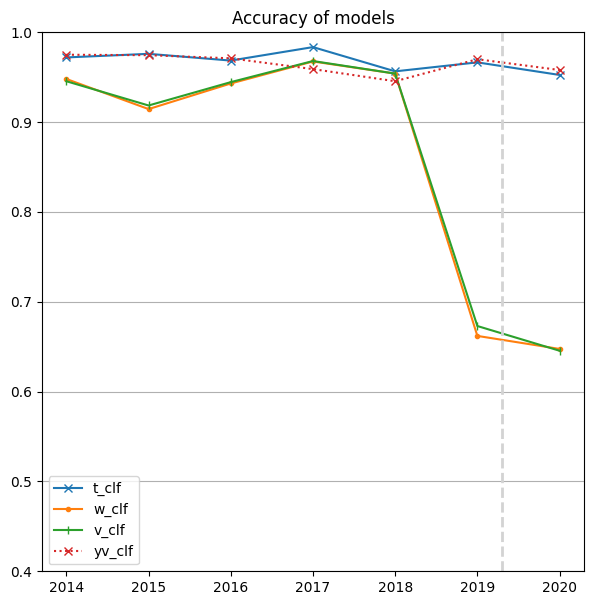

In [25]:
plt.figure(figsize=(7,7))
for i,col in enumerate(df.columns):
    plt.plot(df[col], linestyle=com_maker_line[i][0] , marker=com_maker_line[i][1], label=col)

plt.grid(True, axis='y')
plt.legend(loc=3,bbox_to_anchor=(0, 0))
plt.title('Accuracy of models')
plt.ylim(0.4,1)
plt.axvline(2019.3, 0, 1, color='lightgray', linestyle='--', linewidth=2)
plt.savefig('./visual5/2019_acc_plot.png')
plt.show()